# Regressão aplicada a dados de saturação de água


## Etapa 1: carregamento de dados e pré-processamento
>  Inicialmente irei usar dois tipos de dados: 
> > * Dados1: é com dados calculados do livro do schon, desses dados, temos os perfis de profundidade (depth),  radioatividade (GR), densidade (RHOB), porosidade neutronica (NPHI), resistividade (RES-DEEP), Vsh (VSH), saturação de água (SW) e porosidade de densidade (DPHI-SS), essas ultimas 3 foram calculadas a partir das anteriores e considerando alguns fatores. Dentre os perfis que utilizaremos, o perfil de SW é calculado diretamente da equação de archi com parametros definidos como *Rw=0,03*, *m=1,96* e *n=2,19*
> > * Dados2: é com os dados experimentais e retirados de um poco em Wyoming. Neste, temos dados de profundidade (DEPTH), porosidade sonica (PHI), resistividade (RES) e saturação de água (SW).


> Começaremos fazendo o treinamento da rede através dos dados1

In [22]:
#Bibliotecas que poderão ser usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from welly import Well
import lasio

In [66]:
# Vamos ler o arquivo csv direto com o pandas
dados1 = pd.read_csv('C:/Users/horac/Desktop/masters_project/dados1.csv',sep="\s+|\t+|\s+\t+|\t+\s+", engine='python')
dados1
#dados1=dados1.iloc[21:176,:]
#dados1 = dados1.reset_index(drop = True)

,DEPTH,GR,NPHI,RES-DEEP,SW
0,623.47,40.6,0.051,12.64,0.452596
1,623.62,39.4,0.052,12.73,0.451099
2,623.77,39.6,0.055,12.53,0.454389
3,623.93,41.4,0.058,12.12,0.440224
4,624.08,42.3,0.063,11.85,0.471115
...,...,...,...,...,...
170,649.38,28.6,0.104,0.84,0.959376
171,649.53,26.7,0.102,0.84,1.011385
172,649.68,25.4,0.104,0.84,1.054971
173,649.83,25.2,0.105,0.83,1.168677


In [67]:

dados1


,DEPTH,GR,NPHI,RES-DEEP,SW
0,623.47,40.6,0.051,12.64,0.452596
1,623.62,39.4,0.052,12.73,0.451099
2,623.77,39.6,0.055,12.53,0.454389
3,623.93,41.4,0.058,12.12,0.440224
4,624.08,42.3,0.063,11.85,0.471115
...,...,...,...,...,...
170,649.38,28.6,0.104,0.84,0.959376
171,649.53,26.7,0.102,0.84,1.011385
172,649.68,25.4,0.104,0.84,1.054971
173,649.83,25.2,0.105,0.83,1.168677


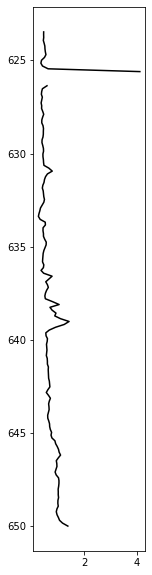

In [68]:
# Plotando para visualizar os perfis
plt.figure(figsize = (2, 10))
plt.plot(dados1['SW'],dados1['DEPTH'],color='k')
ax = plt.gca()
ax.invert_yaxis()